In [6]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
##original data- analysis

In [3]:
columns=['ID Number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
data_og_df=pd.read_csv("/Users/mehakkapoor/Desktop/breast-cancer-wisconsin.csv",sep=',',names=columns)
data_og_df.head()

,ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data_og_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [6]:
data_og_df= data_og_df.replace('?', np.nan)
data_og_df.isna().sum()

ID Number                       0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

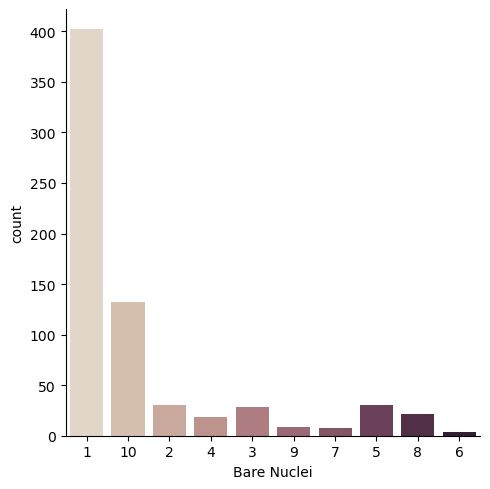

In [9]:
sns.catplot(x="Bare Nuclei", kind="count", palette="ch:.25", data=data_og_df)

In [10]:
#Not a normal distribution so we should replace by median and not average
data_og_df = data_og_df.fillna(data_og_df.median())
data_og_df.dtypes
data_og_df['Bare Nuclei'] = data_og_df['Bare Nuclei'].astype('int64')

Text(0, 0.5, 'Number of People')

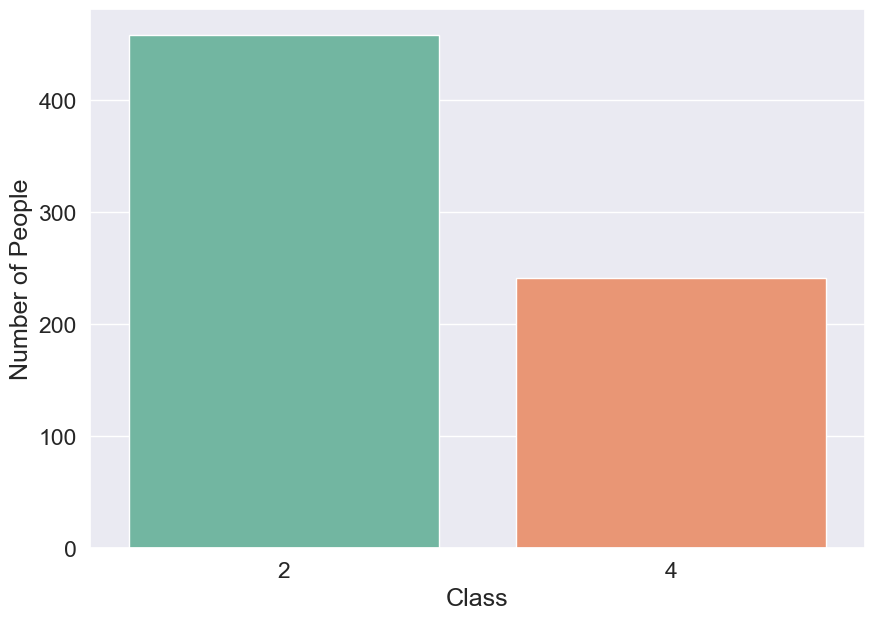

In [19]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Class', data=data_og_df, palette="Set2")
plt.ylabel('Number of People')

In [15]:
data_og_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID Number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [17]:
data_og_df.dtypes

ID Number                       int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [20]:
data_og_df.isnull().values.any()

False

In [33]:
data_og_df['Bare Nuclei']=data_og_df['Bare Nuclei'].replace(to_replace='?',value = 0).astype(int)
data_og_df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [34]:
#data_og_df.drop('ID Number', axis=1, inplace=True)
#data_og_df.drop('ID Number', axis=1, inplace=True)

/var/folders/k6/79wzy9y16vl3txnw0s39jp9r0000gn/T/ipykernel_35912/3735064086.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_og_df['Clump Thickness'], ax = ax[0,0], color = 'red')
/var/folders/k6/79wzy9y16vl3txnw0s39jp9r0000gn/T/ipykernel_35912/3735064086.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

<Axes: xlabel='Class', ylabel='Density'>

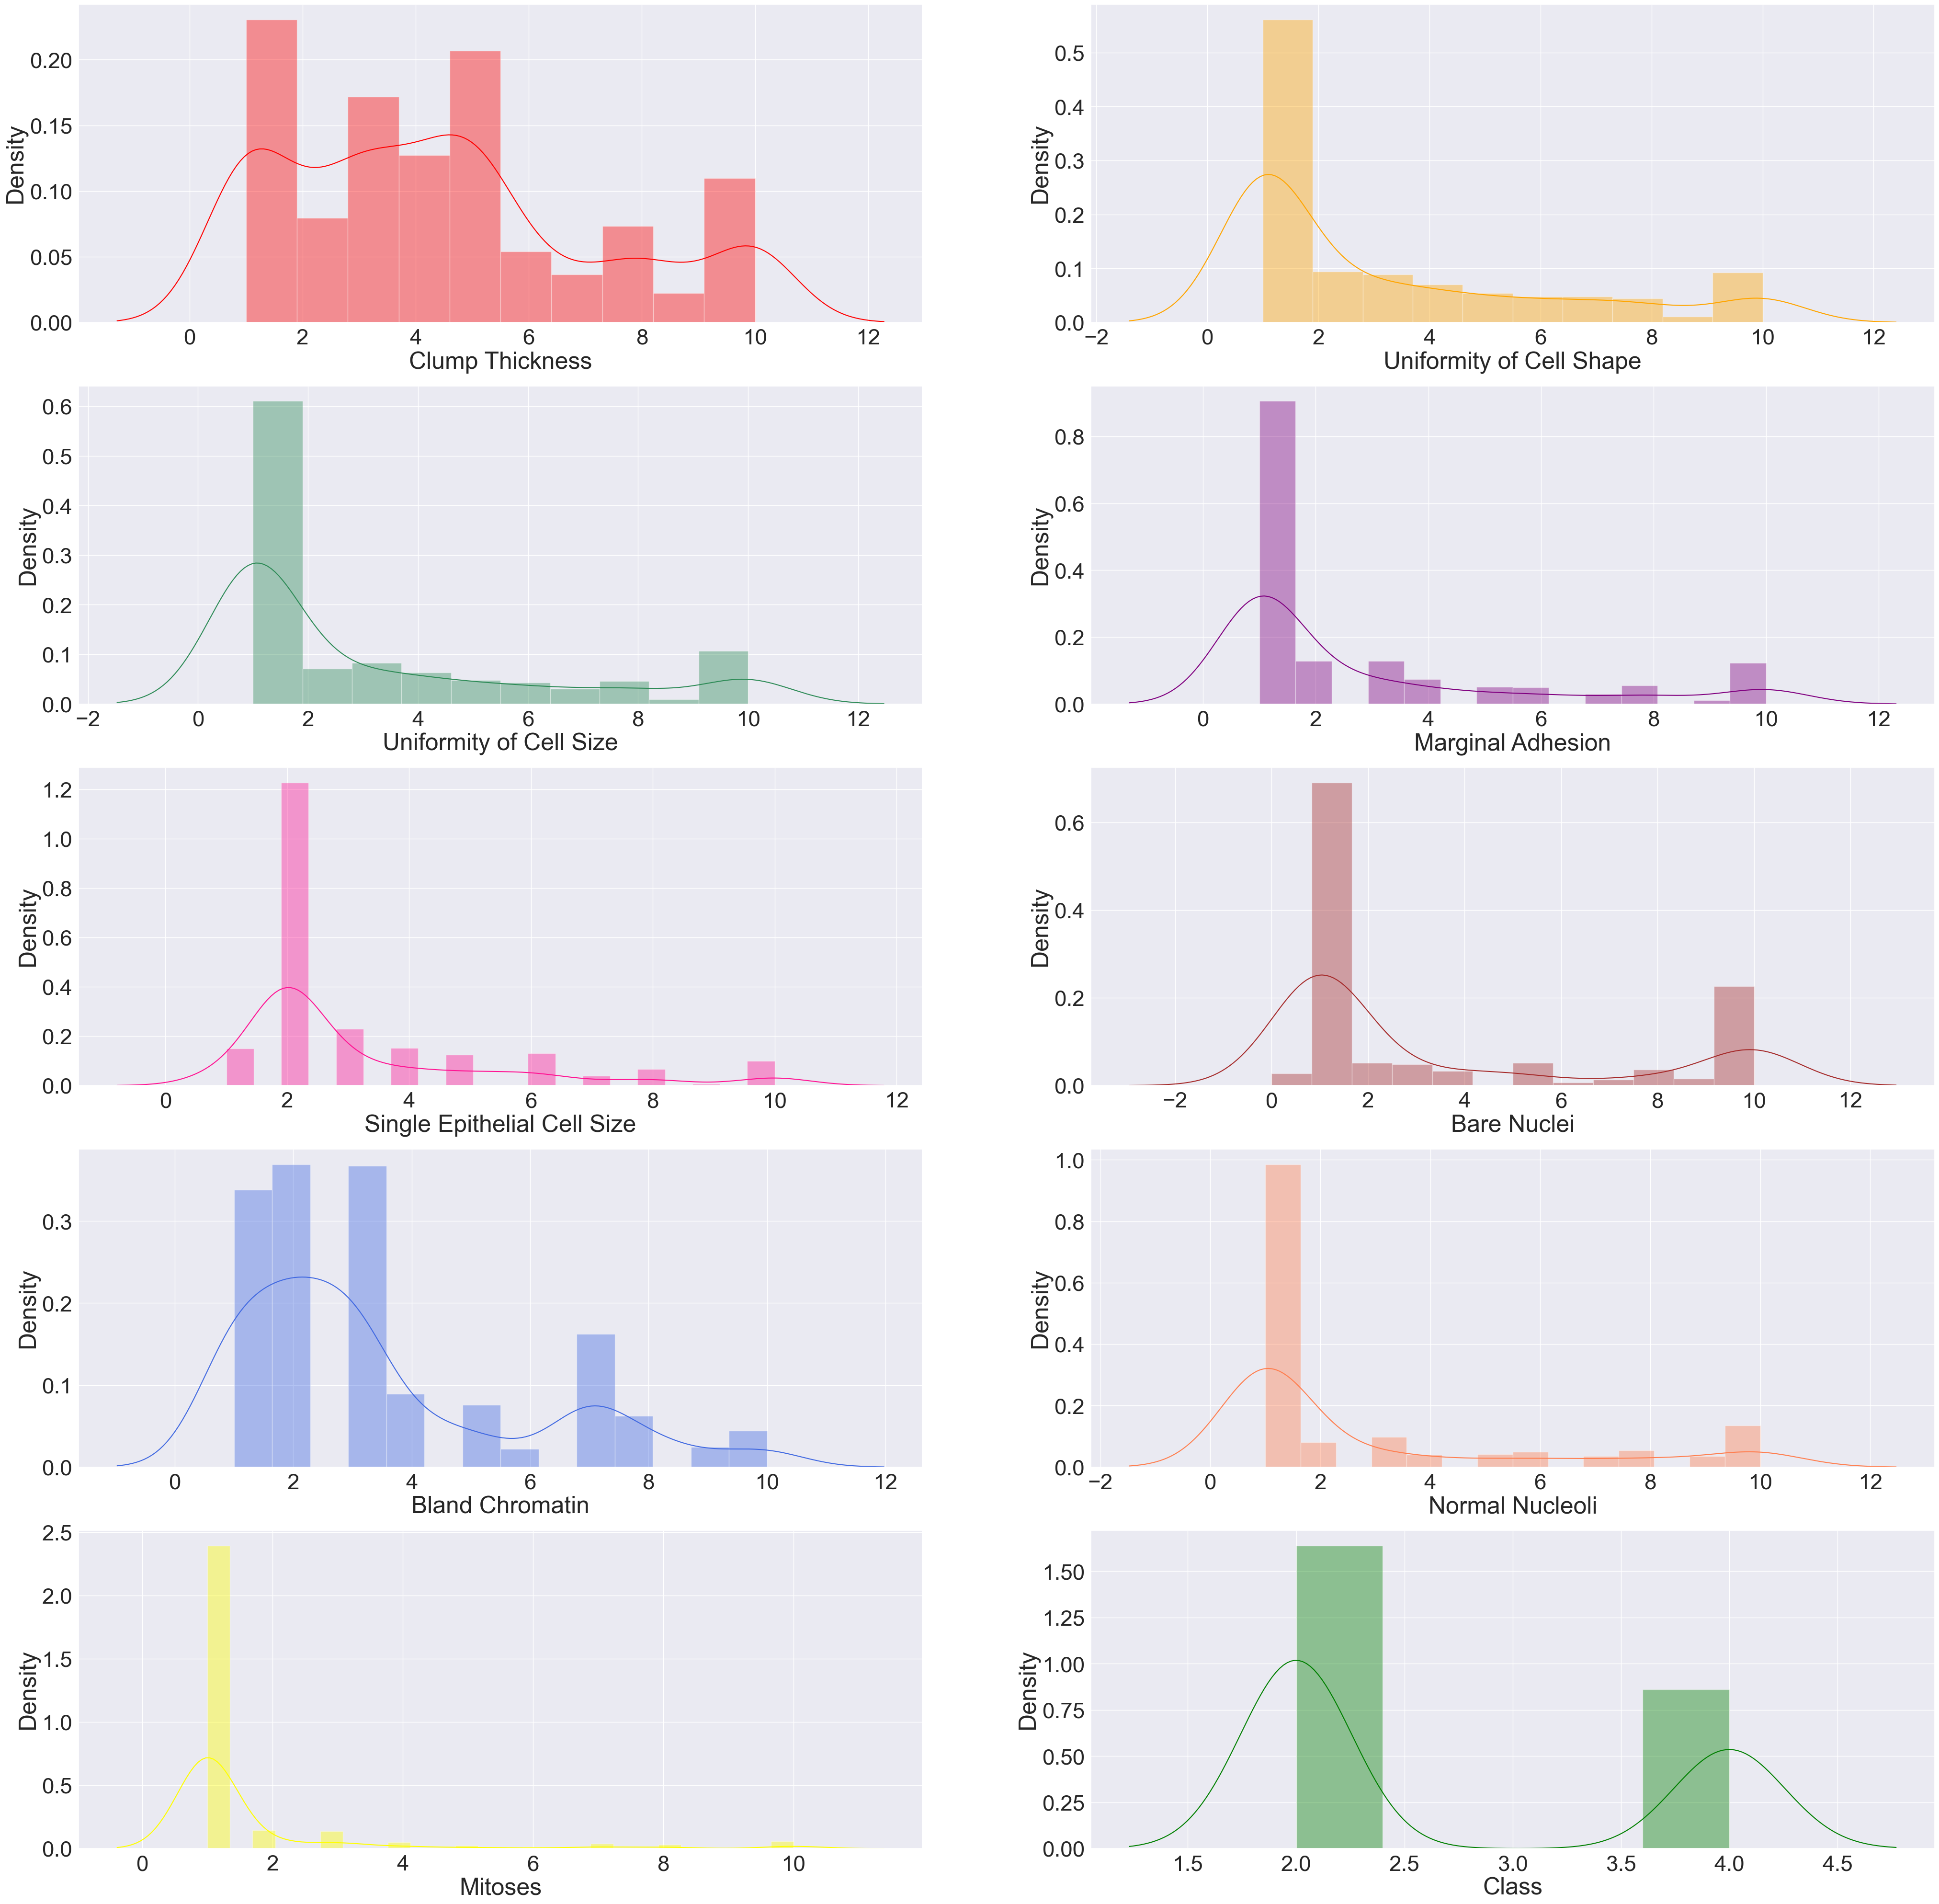

In [35]:
fig, ax = plt.subplots(5,2, figsize=(50,50))
sns.set(font_scale = 3)
sns.distplot(data_og_df['Clump Thickness'], ax = ax[0,0], color = 'red')
sns.distplot(data_og_df['Uniformity of Cell Size'], ax = ax[1,0], color = 'seagreen')
sns.distplot(data_og_df['Uniformity of Cell Shape'], ax = ax[0,1], color = 'orange')
sns.distplot(data_og_df['Marginal Adhesion'], ax = ax[1,1], color = 'purple')
sns.distplot(data_og_df['Single Epithelial Cell Size'], ax = ax[2,0], color = 'deeppink')
sns.distplot(data_og_df['Bare Nuclei'], ax = ax[2,1], color = 'brown')
sns.distplot(data_og_df['Bland Chromatin'], ax = ax[3,0], color = 'royalblue')
sns.distplot(data_og_df['Normal Nucleoli'], ax = ax[3,1], color = 'coral')
sns.distplot(data_og_df['Mitoses'], ax = ax[4,0], color = 'yellow')
sns.distplot(data_og_df['Class'], ax = ax[4,1], color = 'green')

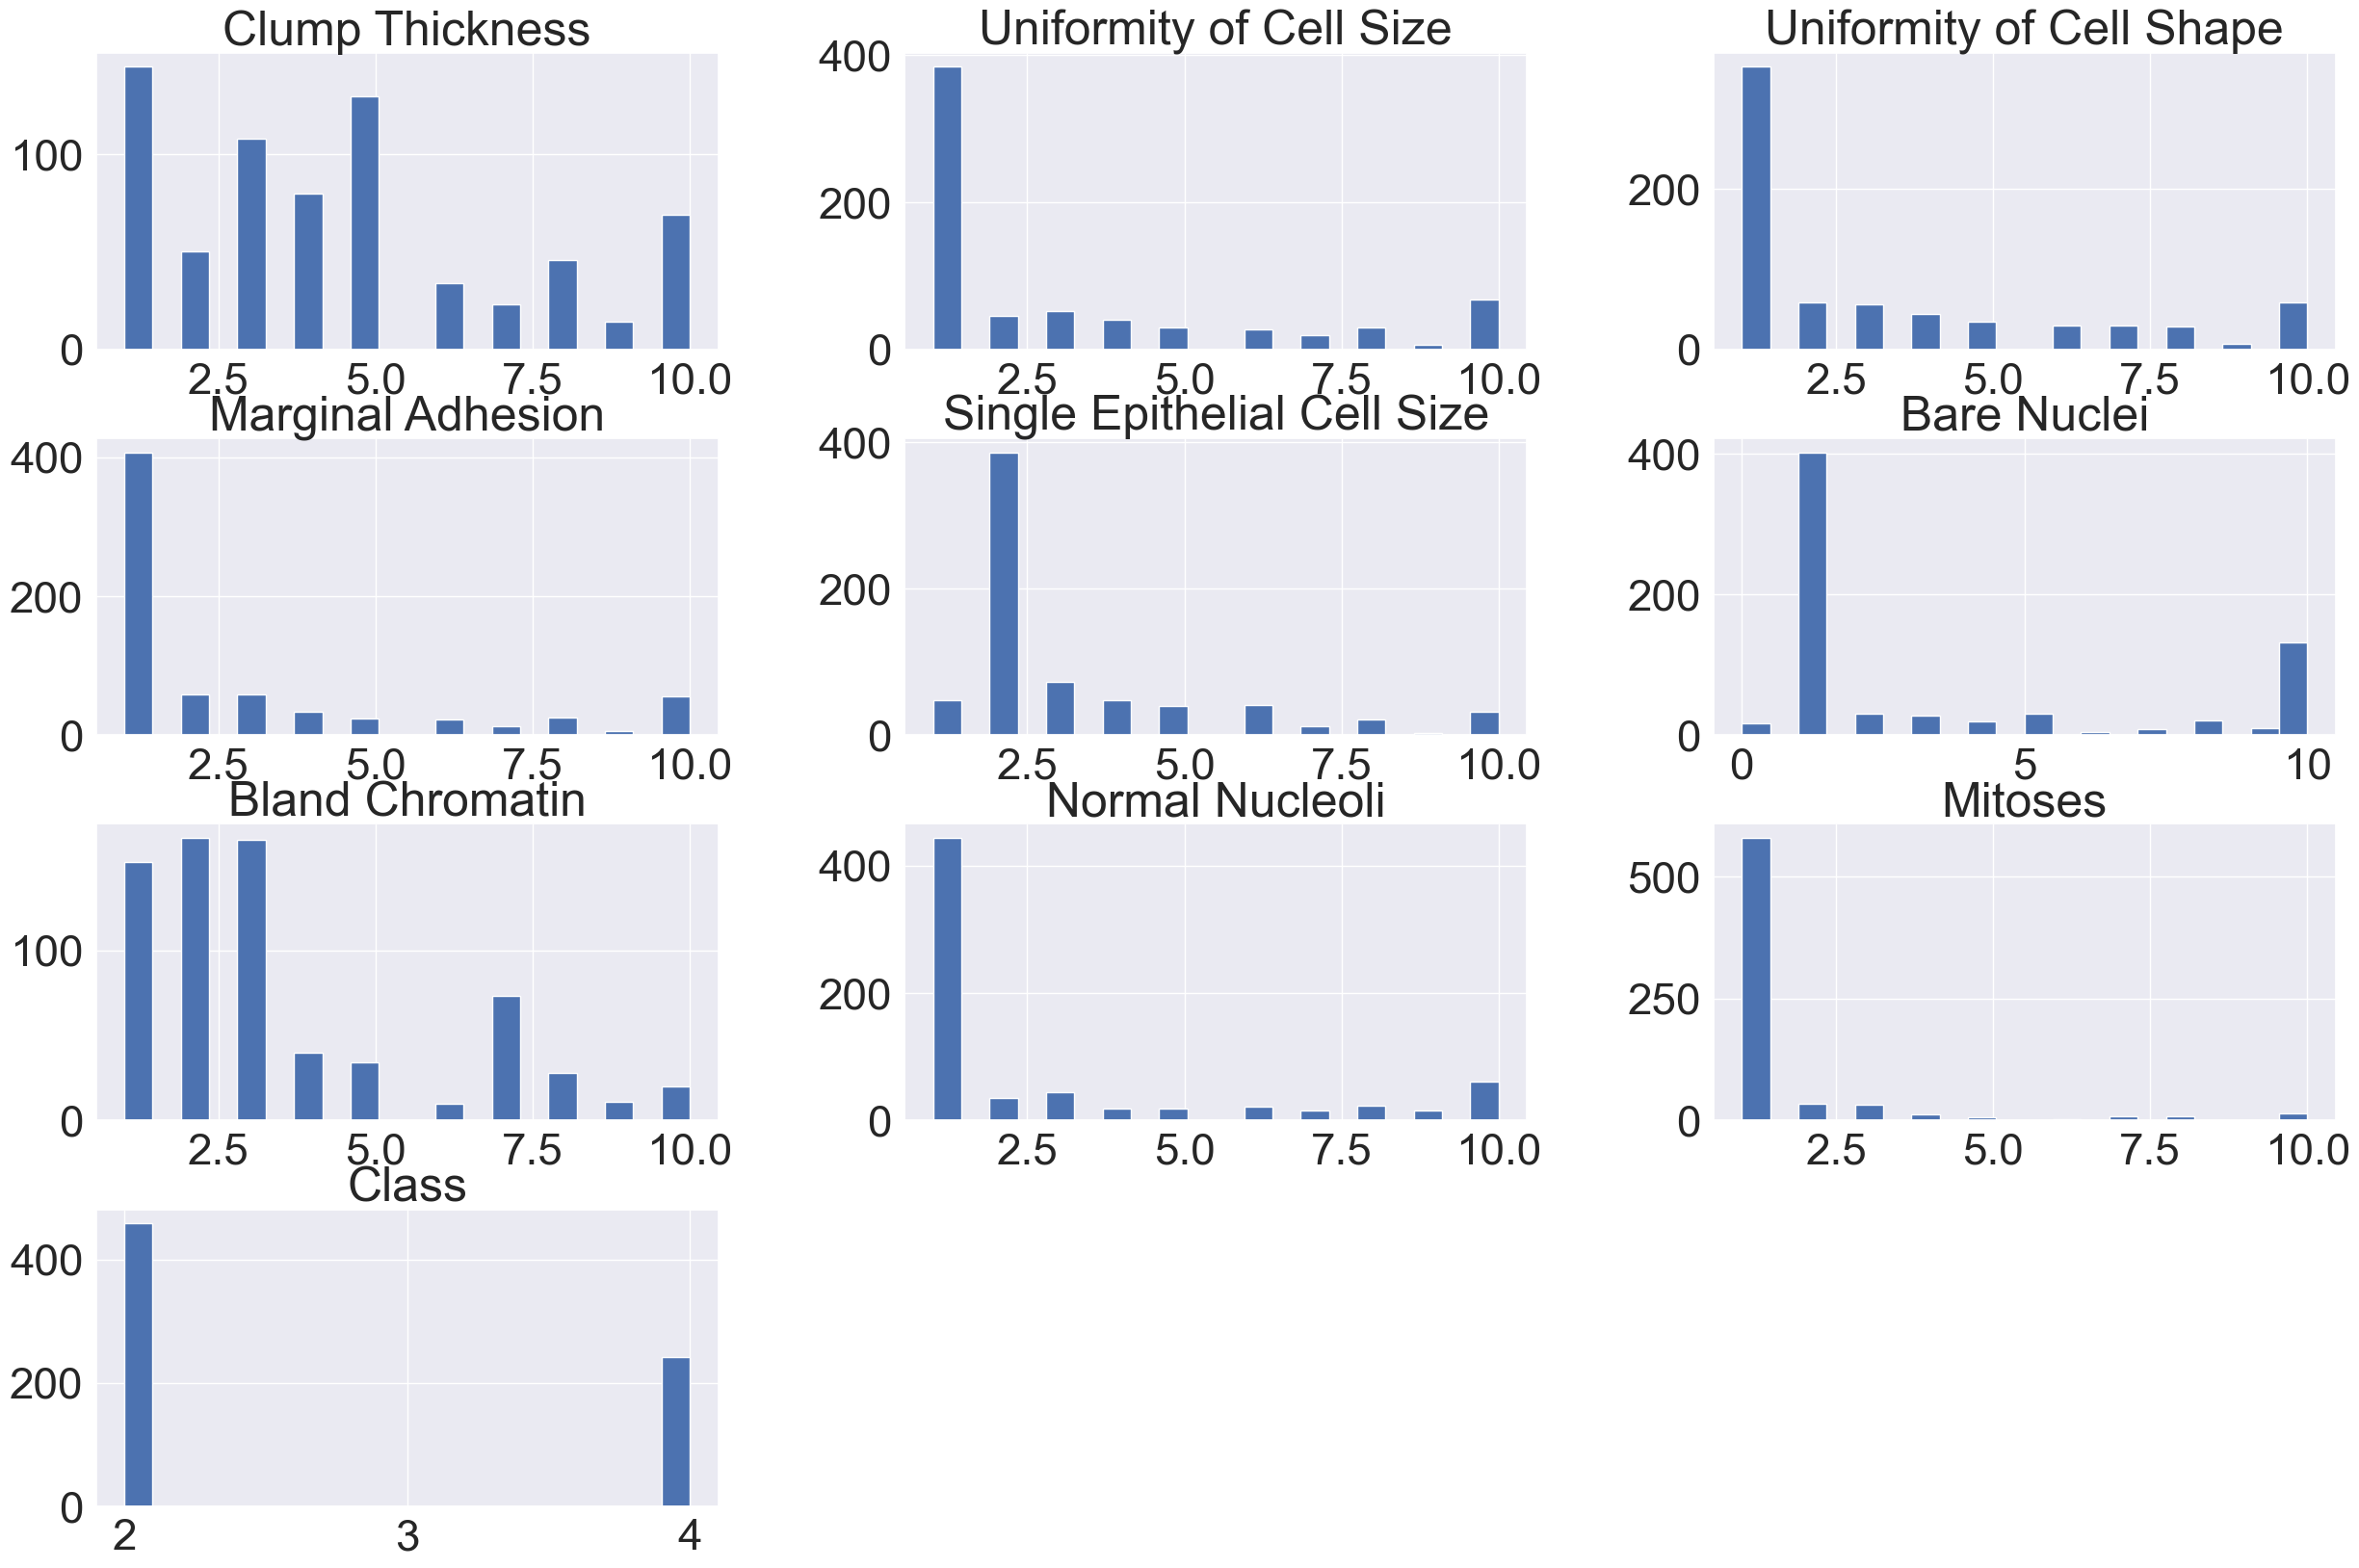

In [36]:
data_og_df.hist(bins=20, figsize=(30,30), layout=(6,3));

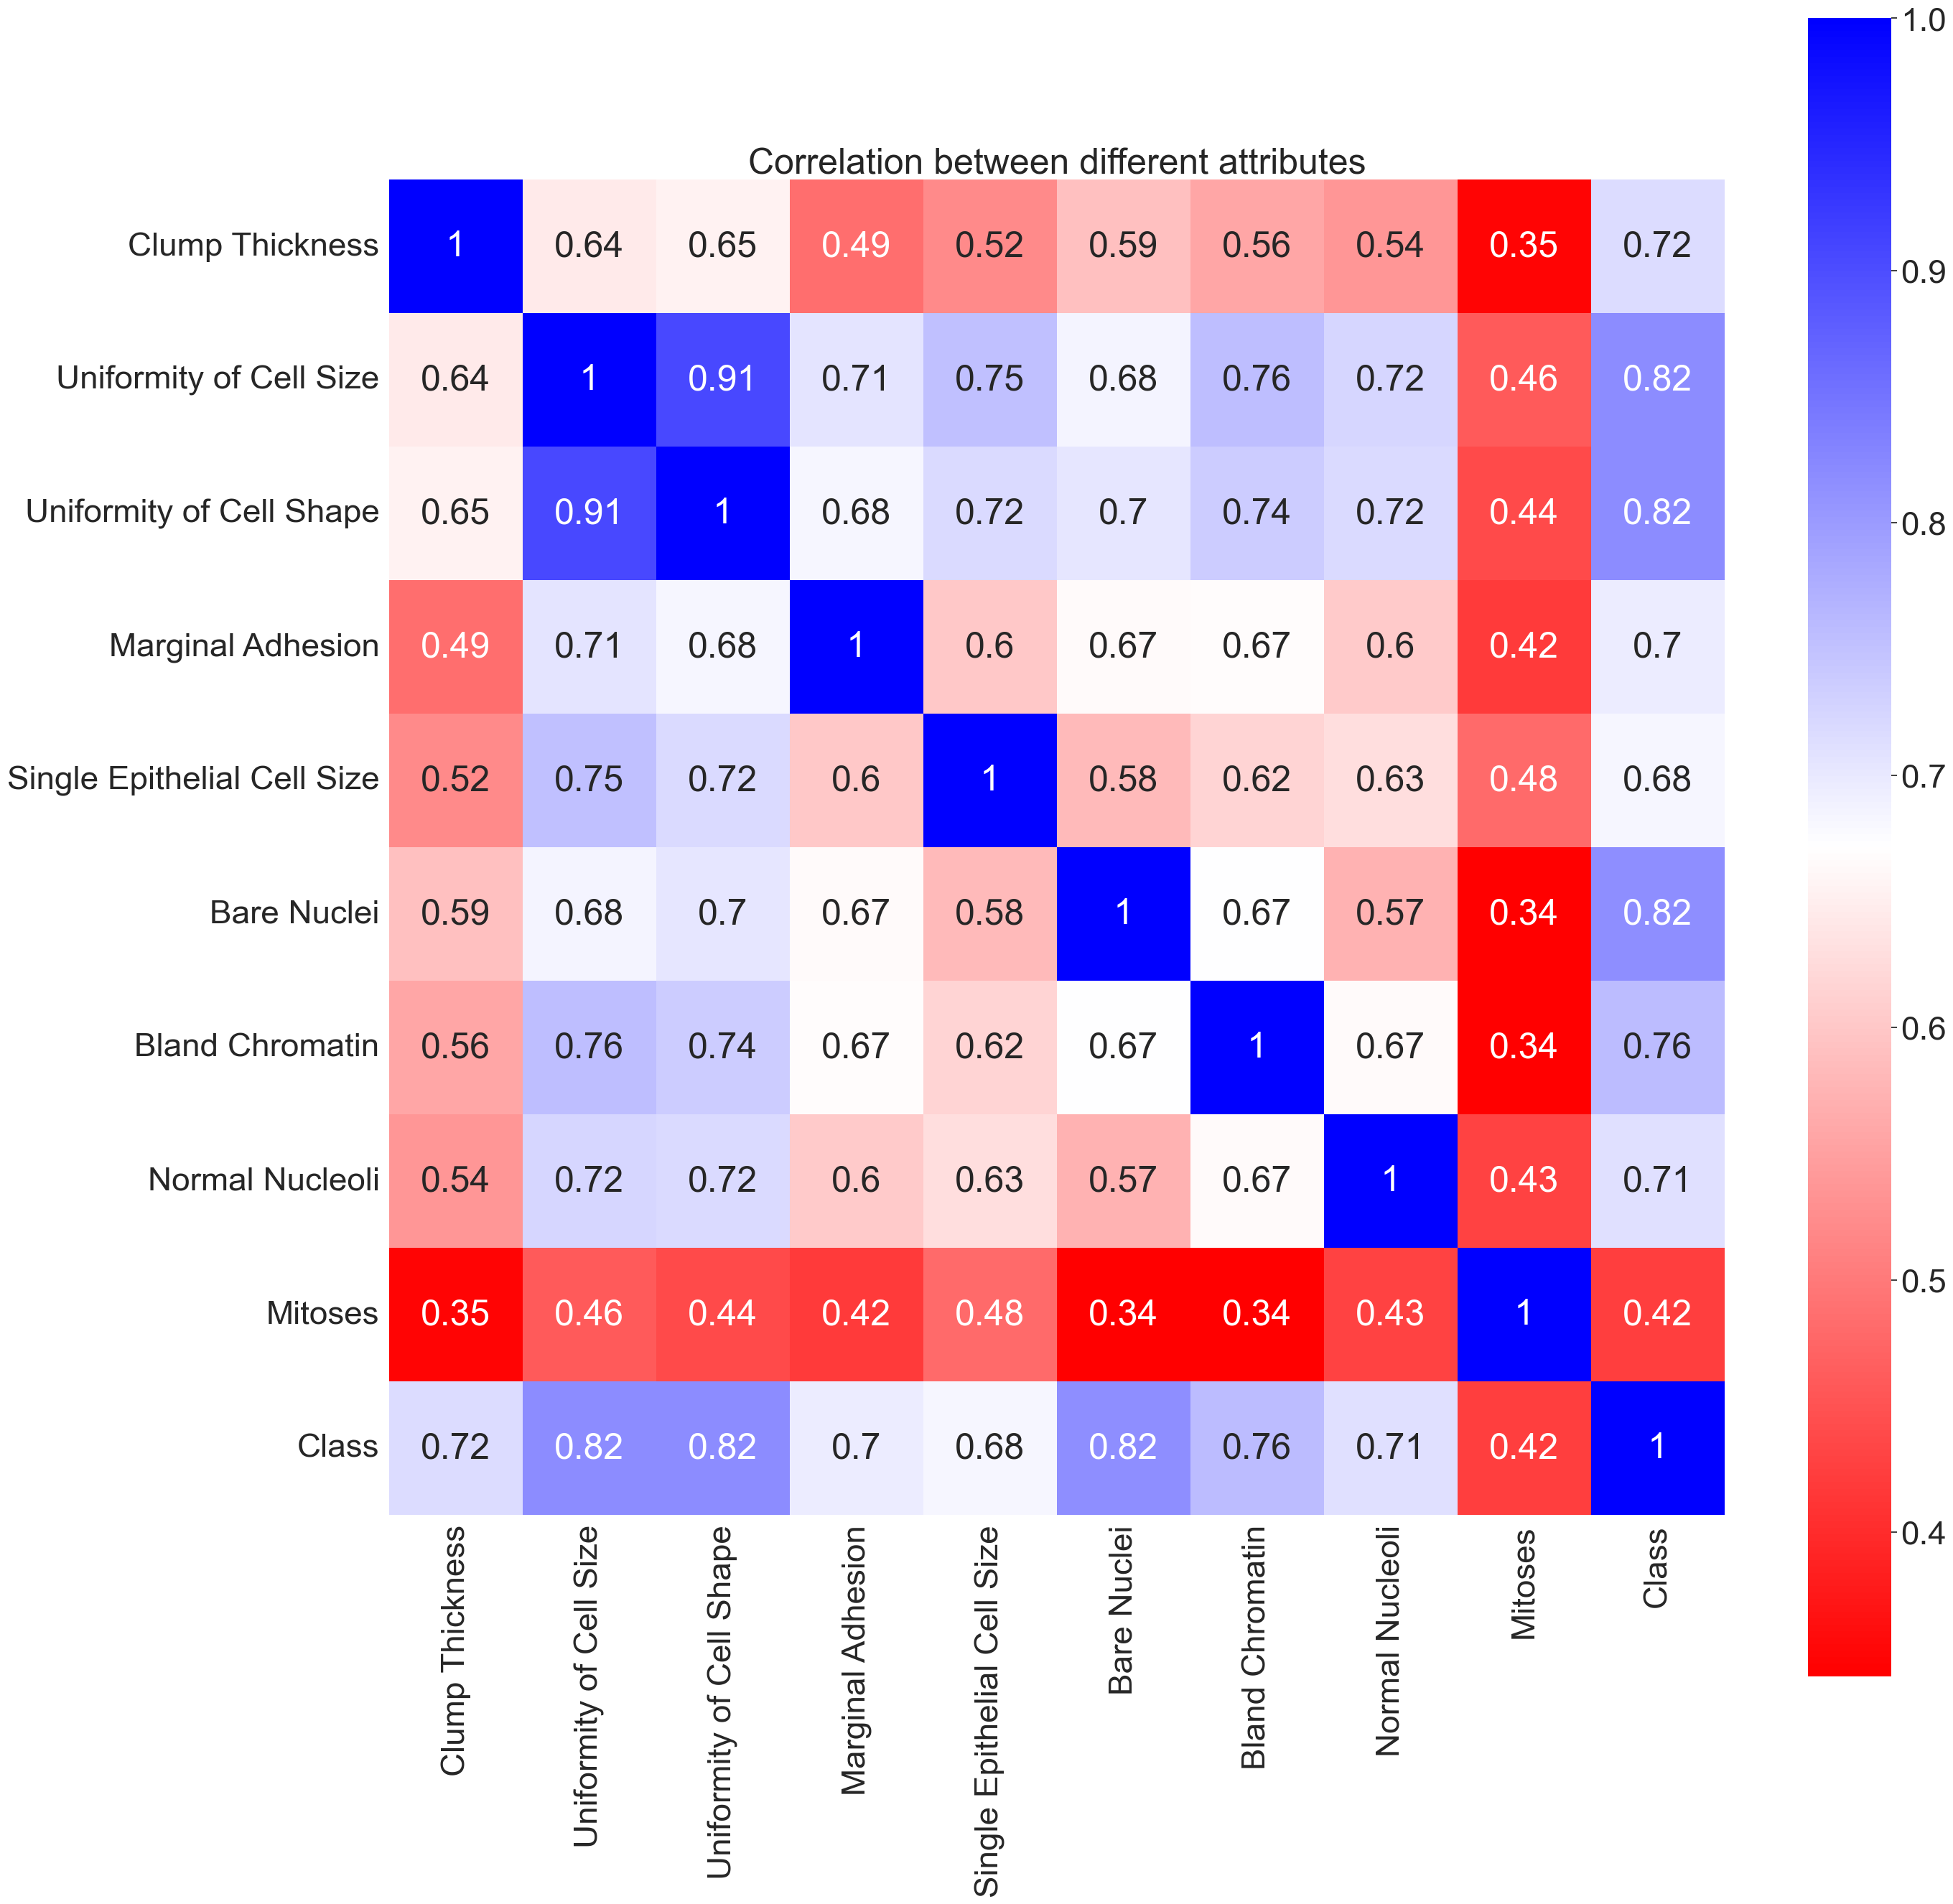

In [41]:
plt.figure(figsize=(30,30))
sns.heatmap(data_og_df.corr(), vmax=1, square=True,annot=True,cmap='bwr_r')
plt.title('Correlation between different attributes')
plt.show()


In [1]:
###Data by using Average values instead of missing values

In [61]:
data=pd.read_excel("/Users/mehakkapoor/Desktop/Cancer Data.xlsx")
data.head()
data_test=pd.read_excel("/Users/mehakkapoor/Desktop/avg_test.xlsx")
data.columns

Index(['ID Number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [25]:
data_test['Class'].value_counts()

2    62
4    38
Name: Class, dtype: int64

In [26]:
data['Class'].unique()

array([2, 4])

In [27]:
data['Class'].value_counts()

2    326
4    173
Name: Class, dtype: int64

In [28]:
data_test.dtypes

ID Number                        int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [29]:
data.dtypes

ID Number                        int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID Number,499.0,1.084534e+06,705328.169125,61634.0,880859.0,1172152.0,1238298.0,13454352.0
Clump Thickness,499.0,4.430862e+00,2.834939,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,499.0,3.078156e+00,3.019998,1.0,1.0,1.0,4.0,10.0
Uniformity of Cell Shape,499.0,3.226453e+00,2.999133,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,499.0,2.771543e+00,2.776101,1.0,1.0,1.0,3.5,10.0
Single Epithelial Cell Size,499.0,3.138277e+00,2.141322,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,499.0,3.558188e+00,3.606688,1.0,1.0,1.0,5.5,10.0
Bland Chromatin,499.0,3.438878e+00,2.498548,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,499.0,2.877756e+00,3.097331,1.0,1.0,1.0,3.0,10.0
Mitoses,499.0,1.553106e+00,1.682262,1.0,1.0,1.0,1.0,10.0


In [31]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID Number,100.0,992114.51000,334923.037529,95719.0,758226.75,1123477.0,1231092.25,1365328.0
Clump Thickness,100.0,4.38000,2.780815,1.0,2.00,4.0,6.00,10.0
Uniformity of Cell Size,100.0,3.35000,3.108720,1.0,1.00,1.0,5.00,10.0
Uniformity of Cell Shape,100.0,3.38000,2.856076,1.0,1.00,2.0,5.00,10.0
Marginal Adhesion,100.0,2.93000,2.931042,1.0,1.00,1.0,4.00,10.0
Single Epithelial Cell Size,100.0,3.54000,2.397052,1.0,2.00,2.0,5.00,10.0
Bare Nuclei,100.0,3.88634,3.841993,1.0,1.00,1.0,8.25,10.0
Bland Chromatin,100.0,3.68000,2.352218,1.0,2.00,3.0,5.00,10.0
Normal Nucleoli,100.0,3.24000,3.191276,1.0,1.00,1.0,5.00,10.0
Mitoses,100.0,1.55000,1.500000,1.0,1.00,1.0,1.00,8.0


In [62]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int64')
data_test['Bare Nuclei'] = data_test['Bare Nuclei'].astype('int64')

In [63]:
data.drop('ID Number', axis=1, inplace=True)
data_test.drop('ID Number', axis=1, inplace=True)

In [64]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1,1,1,1,2,1,2,1,1,2
1,7,6,4,8,10,10,9,5,3,4
2,6,1,1,1,2,1,3,1,1,2
3,3,1,1,1,2,1,3,1,1,2
4,5,1,3,1,2,1,3,1,1,2


In [65]:
X_train = data.drop('Class', axis=1) 
y_train = data['Class']
X_test= data_test.drop('Class', axis=1)
y_test=data_test['Class']

In [23]:
from sklearn.svm import SVC


svc= SVC(gamma=0.025, C=3, kernel='linear')
svc.fit(X_train, y_train)
     

SVC(C=3, gamma=0.025, kernel='linear')

In [24]:
predicted_2 = svc.predict(X_test)
predicted_2

array([2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2])

In [25]:

print('SupportVectorClassifier Agorithm is predicting at {0:.2g}%'.format(svc.score(X_test, y_test)*100))

SupportVectorClassifier Agorithm is predicting at 95%


Confusion Matrix For SupportVectorMachine


<Axes: >

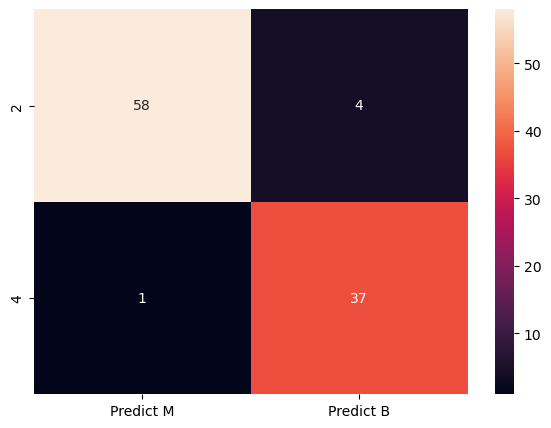

In [26]:
from sklearn import metrics
print("Confusion Matrix For SupportVectorMachine")
cm=metrics.confusion_matrix(y_test, predicted_2, labels=[2, 4])

df_cm = pd.DataFrame(cm, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

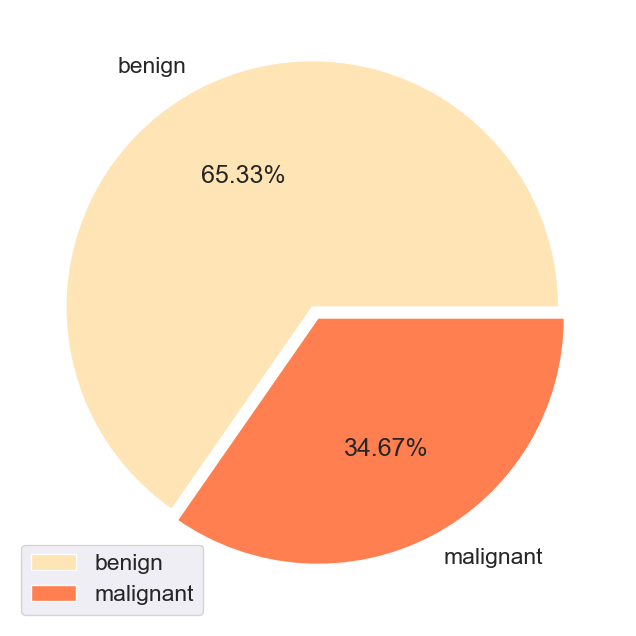

In [27]:
plt.figure(figsize=(8,8))
pieC = data['Class'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['benign', 'malignant']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('benign', 'malignant'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

In [28]:
###Data by using No col values instead of missing values

In [46]:
data_nocol=pd.read_excel("/Users/mehakkapoor/Desktop/Nocol_train.xlsx")
data_test_nocol=pd.read_excel("/Users/mehakkapoor/Desktop/Nocol_test.xlsx")
data_nocol.head()

,ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1108449,5,3,3,4,2,3,4,1,4
1,183936,3,1,1,1,2,2,1,1,2
2,303213,10,4,4,10,6,5,5,1,4
3,486662,2,1,1,2,2,3,1,1,2
4,1108370,9,5,8,1,2,2,1,5,4


In [3]:
data_test_nocol['Class'].value_counts()

2    68
4    32
Name: Class, dtype: int64

In [4]:
data_nocol['Class'].value_counts()

2    326
4    173
Name: Class, dtype: int64

In [5]:
data_nocol.dtypes
data_test_nocol.dtypes

ID Number                      int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [47]:
X_train_nocol = data_nocol.drop('Class', axis=1) 
y_train_nocol = data_nocol['Class']
X_test_nocol= data_test_nocol.drop('Class', axis=1)
y_test_nocol=data_test_nocol['Class']

In [8]:
from sklearn.svm import SVC

svc= SVC( C=3, kernel='linear',random_state=1)
svc.fit(X_train_nocol, y_train_nocol)

In [ ]:
predicted_2_nocol = svc.predict(X_test_nocol)
predicted_2_nocol

In [ ]:
print('SupportVectorClassifier Agorithm is predicting at {0:.2g}%'.format(svc.score(X_test_nocol, y_test_nocol)*100))

In [ ]:
from sklearn import metrics
print("Confusion Matrix For SupportVectorMachine")
cm_nocol=metrics.confusion_matrix(y_test_nocol, predicted_2_nocol, labels=[2, 4])

df_cm_nocol = pd.DataFrame(cm_nocol, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nocol, annot=True)

In [ ]:
plt.figure(figsize=(8,8))
pieC_nocol = data_nocol['Class'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['benign', 'malignant']
sns.set(font_scale = 1.5)
plt.pie(pieC_nocol, labels = ('benign', 'malignant'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

In [ ]:
##Data by removing 16 row values instead of missing values

In [3]:
data_norow=pd.read_excel("/Users/mehakkapoor/Desktop/Norow_train.xlsx")
data_test_norow=pd.read_excel("/Users/mehakkapoor/Desktop/Norow_test.xlsx")
data_norow.head()

,ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,63375,9,1,2,6,4,10,7,7,2,4
1,95719,6,10,10,10,8,10,7,10,7,4
2,142932,7,6,10,5,3,10,9,10,2,4
3,144888,8,10,10,8,5,10,7,8,1,4
4,160296,5,8,8,10,5,10,8,10,3,4


In [4]:
data_test_norow['Class'].value_counts()

2    92
4     5
Name: Class, dtype: int64

In [5]:
data_norow['Class'].value_counts()

2    257
4    232
Name: Class, dtype: int64

In [6]:
data_norow.dtypes
data_test_norow.dtypes

ID Number                      int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [7]:
X_train_norow = data_norow.drop('Class', axis=1) 
y_train_norow = data_norow['Class']
X_test_norow= data_test_norow.drop('Class', axis=1)
y_test_norow=data_test_norow['Class']

In [8]:
from sklearn.svm import SVC

svc= SVC(gamma=0.025, C=3, kernel='linear')
svc.fit(X_train_norow, y_train_norow)

In [ ]:
predicted_2_norow = svc.predict(X_test_norow)
predicted_2_norow

In [ ]:
print('SupportVectorClassifier Agorithm is predicting at {0:.2g}%'.format(svc.score(X_test_norow, y_test_norow)*100))

In [ ]:
from sklearn import metrics
print("Confusion Matrix For SupportVectorMachine")
cm_norow=metrics.confusion_matrix(y_test_norow, predicted_2_norow, labels=[2, 4])

df_cm_norow = pd.DataFrame(cm_norow, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_norow, annot=True)

In [ ]:
plt.figure(figsize=(8,8))
pieC_norow = data_norow['Class'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['benign', 'malignant']
sns.set(font_scale = 1.5)
plt.pie(pieC_norow, labels = ('benign', 'malignant'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

In [ ]:
##Using Logistic Regression on data

In [ ]:
#column

In [39]:
##simple LR
#classifier_nocol = LogisticRegression(random_state = 0)
#classifier_nocol.fit(X_train_nocol, y_train_nocol)

LogisticRegression(random_state=0)

In [51]:
random_state = 42
log_clf_nocol = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf_nocol = GridSearchCV(estimator = log_clf_nocol, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf_nocol.fit(X_train_nocol, y_train_nocol)

best_parameters_nocol = CV_log_clf_nocol.best_params_
print('The best parameters for using this model is', best_parameters_nocol)

CV_log_clf_nocol = LogisticRegression(C = best_parameters_nocol['C'], 
                                penalty = best_parameters_nocol['penalty'], 
                                random_state = random_state)

CV_log_clf_nocol.fit(X_train_nocol, y_train_nocol)
y_pred_nocol = CV_log_clf_nocol.predict(X_test_nocol)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameters for using this model is {'C': 0.001, 'penalty': 'l2'}


/Users/mehakkapoor/$/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mehakkapoor/$/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mehakkapoor/$/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mehakkapoor/$/opt/anaconda3/envs/wo

Confusion Matrix For Logistic Regression


<Axes: >

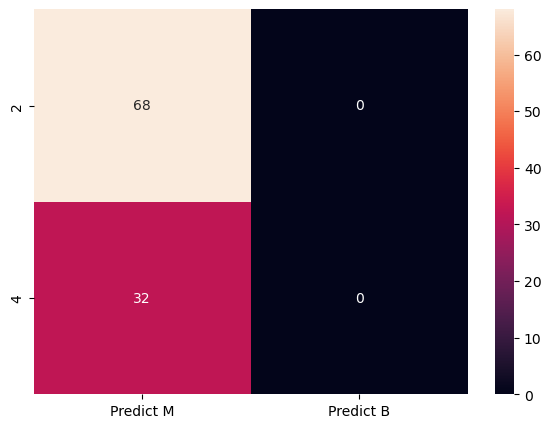

In [52]:
from sklearn import metrics
#y_pred_nocol = classifier_nocol.predict(X_test_nocol)
#accuracy_score(y_test_nocol, y_pred_nocol)
print("Confusion Matrix For Logistic Regression")
cm_nocol=metrics.confusion_matrix(y_test_nocol, y_pred_nocol, labels=[2, 4])

df_cm_nocol = pd.DataFrame(cm_nocol, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nocol, annot=True)

In [53]:
print('Logistic Regression Agorithm is predicting at {0:.2g}%'.format(CV_log_clf_nocol.score(X_test_nocol, y_test_nocol)*100))

Logistic Regression Agorithm is predicting at 68%


In [44]:
print('Logistic Regression Agorithm is predicting at {0:.2g}%'.format(classifier_nocol_1.score(X_test_nocol, y_test_nocol)*100))

Logistic Regression Agorithm is predicting at 68%


In [12]:
##row

In [54]:
data_norow=pd.read_excel("/Users/mehakkapoor/Desktop/Norow_train.xlsx")
data_test_norow=pd.read_excel("/Users/mehakkapoor/Desktop/Norow_test.xlsx")
data_norow.head()

,ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,63375,9,1,2,6,4,10,7,7,2,4
1,95719,6,10,10,10,8,10,7,10,7,4
2,142932,7,6,10,5,3,10,9,10,2,4
3,144888,8,10,10,8,5,10,7,8,1,4
4,160296,5,8,8,10,5,10,8,10,3,4


In [55]:
X_train_norow = data_norow.drop('Class', axis=1) 
y_train_norow = data_norow['Class']
X_test_norow= data_test_norow.drop('Class', axis=1)
y_test_norow=data_test_norow['Class']

In [56]:
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train_norow, y_train_norow)

In [57]:
random_state = 42
log_clf_norow = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf_norow = GridSearchCV(estimator = log_clf_norow, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf_norow.fit(X_train_norow, y_train_norow)

best_parameters_norow = CV_log_clf_norow.best_params_
print('The best parameters for using this model is', best_parameters_norow)

CV_log_clf_norow = LogisticRegression(C = best_parameters_norow['C'], 
                                penalty = best_parameters_norow['penalty'], 
                                random_state = random_state)

CV_log_clf_norow.fit(X_train_norow, y_train_norow)
y_pred_norow = CV_log_clf_norow.predict(X_test_norow)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameters for using this model is {'C': 0.001, 'penalty': 'l2'}


/Users/mehakkapoor/$/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mehakkapoor/$/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mehakkapoor/$/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mehakkapoor/$/opt/anaconda3/envs/wo

Confusion Matrix For Logistic Regression


<Axes: >

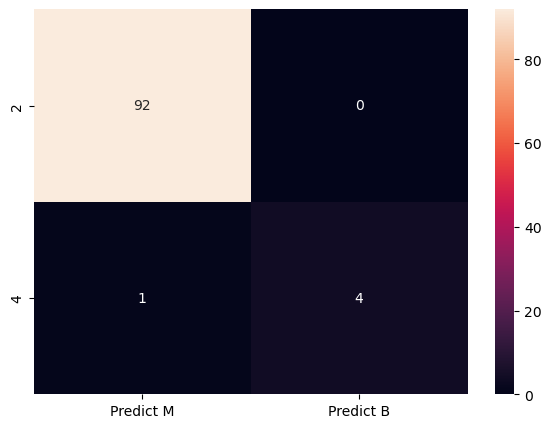

In [58]:
from sklearn import metrics
y_pred_norow = CV_log_clf_norow.predict(X_test_norow)
print("Confusion Matrix For Logistic Regression")
cm_norow=metrics.confusion_matrix(y_test_norow, y_pred_norow, labels=[2, 4])

df_cm_norow = pd.DataFrame(cm_norow, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_norow, annot=True)

In [59]:
print('Logistic Regression Agorithm is predicting at {0:.2g}%'.format(classifier.score(X_test_norow, y_test_norow)*100))

Logistic Regression Agorithm is predicting at 99%


In [22]:
#Average values

In [60]:
#classifier_avg = LogisticRegression(random_state = 0)
#classifier_avg.fit(X_train, y_train)

In [66]:
random_state = 42
log_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

CV_log_clf = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = random_state)

CV_log_clf.fit(X_train, y_train)
y_pred = CV_log_clf.predict(X_test)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameters for using this model is {'C': 10, 'penalty': 'l2'}


/Users/mehakkapoor/$/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mehakkapoor/$/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mehakkapoor/$/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mehakkapoor/$/opt/anaconda3/envs/wo

Confusion Matrix For Logistic Regression


<Axes: >

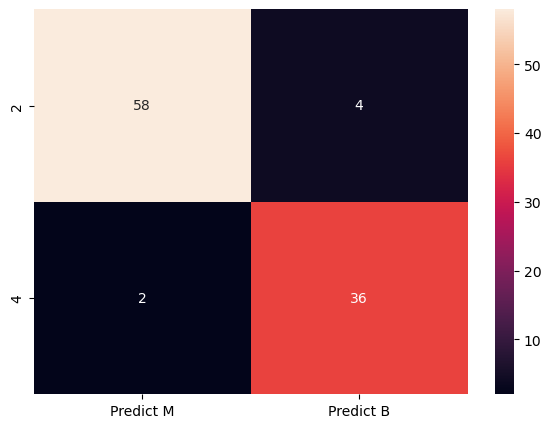

In [67]:
y_pred = CV_log_clf.predict(X_test)
print("Confusion Matrix For Logistic Regression")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[2, 4])

df_cm = pd.DataFrame(cm, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [68]:
print('Logistic Regression Agorithm is predicting at {0:.2g}%'.format(CV_log_clf.score(X_test, y_test)*100))

Logistic Regression Agorithm is predicting at 94%
